In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

import seaborn as sns

import os
import sys

sys.path.append("../")  # append for conformal function

from plots.utils_plots import set_aistats2023_style
from tueplots import figsizes, axes, fontsizes


In [2]:
cmap = sns.color_palette("deep")
ova_plot_args = {"alpha": 0.5,
                 "marker": "o",
                 "color": cmap[0],
                 "linestyle": "dotted"}

softmax_plot_args = {"alpha": 0.5,
                     "marker": "s",
                     "color": cmap[1],
                     "linestyle": "dashed"}
exp_list = [1, 2, 4, 6, 8, 12, 16]

# HAM10000

In [8]:
dataset = "HAM10000"
softmax_ham_mean = np.array([84.63, 78.88, 53.30, 62.10, 60.54, 69.42, 63.93])
softmax_ham_std = np.array([3.88, 1.81, 10.30, 9.11, 8.43, 1.38, 1.27])
ova_ham_mean = np.array([83.46, 87.26, 58.20, 69.89, 52.18, 50.59, 67.29])
ova_ham_std = np.array([0.56, 2.93, 16.48, 12.32, 5.82, 12.63, 4.49])

HAM10000 | OvA 1 expert: Mean 83.46 \ Std 0.56
HAM10000 | Softmax 1 expert: Mean 84.63 \ Std 3.88
HAM10000 | OvA 2 expert: Mean 87.26 \ Std 2.93
HAM10000 | Softmax 2 expert: Mean 78.88 \ Std 1.81
HAM10000 | OvA 4 expert: Mean 58.2 \ Std 16.48
HAM10000 | Softmax 4 expert: Mean 53.3 \ Std 10.3
HAM10000 | OvA 6 expert: Mean 69.89 \ Std 12.32
HAM10000 | Softmax 6 expert: Mean 62.1 \ Std 9.11
HAM10000 | OvA 8 expert: Mean 52.18 \ Std 5.82
HAM10000 | Softmax 8 expert: Mean 60.54 \ Std 8.43
HAM10000 | OvA 12 expert: Mean 50.59 \ Std 12.63
HAM10000 | Softmax 12 expert: Mean 69.42 \ Std 1.38
HAM10000 | OvA 16 expert: Mean 67.29 \ Std 4.49
HAM10000 | Softmax 16 expert: Mean 63.93 \ Std 1.27


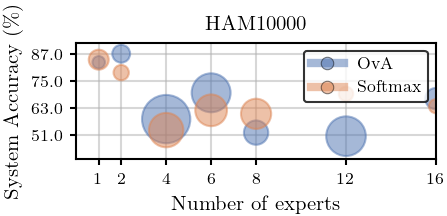

In [9]:
set_aistats2023_style()

fig, ax = plt.subplots(1,1, sharex=True, sharey=True) # note we must use plt.subplots, not plt.subplot
x_axis = [exp*20 for exp in exp_list]

scale_mark = 5
scale_y = 2
for i, e in enumerate(exp_list):    
    radius_ova = ova_ham_std[i]
    print("{} | OvA {} expert: Mean {} \ Std {}".format(dataset, e, ova_ham_mean[i], ova_ham_std[i]))
    plt.gca().add_patch(plt.Circle((x_axis[i], ova_ham_mean[i] * scale_y), radius_ova + scale_mark, fill=True, alpha=0.5, color=cmap[0]))
    radius_softmax = softmax_ham_std[i]
    print("{} | Softmax {} expert: Mean {} \ Std {}".format(dataset, e, softmax_ham_mean[i], softmax_ham_std[i]))
    plt.gca().add_patch(plt.Circle((x_axis[i], softmax_ham_mean[i] * scale_y), radius_softmax + scale_mark, fill=True, alpha=0.5, color=cmap[1]))

# plt.plot(x_axis, ova_galaxy_mean, color="black", linestyle="dotted", alpha=0.5)
# plt.plot(x_axis, softmax_galaxy_mean, color="black", linestyle="dashed", alpha=0.5)

ax.set_xlim(0, 170)
ax.set_xticks(x_axis, exp_list)
min_y = min(min(ova_ham_mean), min(softmax_ham_mean))
max_y = max(max(ova_ham_mean), max(softmax_ham_mean))
ax.set_ylim(min_y*scale_y -20, max_y*scale_y +10)

yticks = np.round(np.linspace(min_y, max_y, len(exp_list)))[::2]
ax.set_yticks(yticks*scale_y, yticks)

# Legend
ova_leg = mlines.Line2D([], [], label="OvA", alpha=0.5, marker="o", color=cmap[0])
softmax_leg = mlines.Line2D([], [], label="Softmax", alpha=0.5, marker="o", color=cmap[1])
plt.legend(handles=[ova_leg, softmax_leg], loc="best")

ax.set_ylabel(r"System Accuracy $(\%)$")
ax.set_xlabel(r"Number of experts")
plt.title("{}".format(dataset))
ax.grid()

# IMPORTANT! This allows to get the circles. Otherwise, ellipses!
plt.gca().set_aspect(1, adjustable='box')

plt.savefig("ham10000_systemaccuracy.pdf")

# Galaxy

In [10]:
dataset = "Galaxy"
softmax_galaxy_mean = np.array([85.62, 74.63, 71.65, 77.82, 81.86, 77.9, 79.31])
softmax_galaxy_std = np.array([1.86, 3.57, 1.26, 4.64, 2.16, 1.43, 3.67])
ova_galaxy_mean = np.array([87.46, 81.60, 83.89, 78.06, 83.70, 81.39, 81.43])
ova_galaxy_std = np.array([0.91, 1.18, 1.95, 1.85, 2.89, 1.24, 0.24])

Galaxy | OvA 1 expert: Mean 87.46 \ Std 0.91
Galaxy | Softmax 1 expert: Mean 85.62 \ Std 1.86
Galaxy | OvA 2 expert: Mean 81.6 \ Std 1.18
Galaxy | Softmax 2 expert: Mean 74.63 \ Std 3.57
Galaxy | OvA 4 expert: Mean 83.89 \ Std 1.95
Galaxy | Softmax 4 expert: Mean 71.65 \ Std 1.26
Galaxy | OvA 6 expert: Mean 78.06 \ Std 1.85
Galaxy | Softmax 6 expert: Mean 77.82 \ Std 4.64
Galaxy | OvA 8 expert: Mean 83.7 \ Std 2.89
Galaxy | Softmax 8 expert: Mean 81.86 \ Std 2.16
Galaxy | OvA 12 expert: Mean 81.39 \ Std 1.24
Galaxy | Softmax 12 expert: Mean 77.9 \ Std 1.43
Galaxy | OvA 16 expert: Mean 81.43 \ Std 0.24
Galaxy | Softmax 16 expert: Mean 79.31 \ Std 3.67


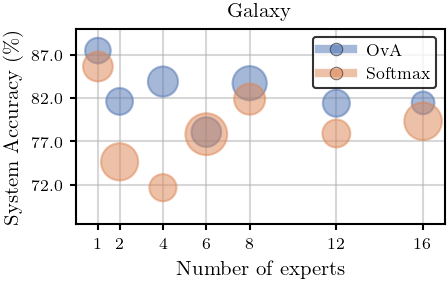

In [6]:
set_aistats2023_style()

fig, ax = plt.subplots(1,1) # note we must use plt.subplots, not plt.subplot
x_axis = [exp*10 for exp in exp_list]

scale_mark = 5
scale_y = 4
for i, e in enumerate(exp_list):    
    radius_ova = ova_galaxy_std[i]
    print("{} | OvA {} expert: Mean {} \ Std {}".format(dataset, e, ova_galaxy_mean[i], ova_galaxy_std[i]))
    plt.gca().add_patch(plt.Circle((x_axis[i], ova_galaxy_mean[i] * scale_y), radius_ova + scale_mark, fill=True, alpha=0.5, color=cmap[0]))
    radius_softmax = softmax_galaxy_std[i]
    print("{} | Softmax {} expert: Mean {} \ Std {}".format(dataset, e, softmax_galaxy_mean[i], softmax_galaxy_std[i]))
    plt.gca().add_patch(plt.Circle((x_axis[i], softmax_galaxy_mean[i] * scale_y), radius_softmax + scale_mark, fill=True, alpha=0.5, color=cmap[1]))

# plt.plot(x_axis, ova_galaxy_mean, color="black", linestyle="dotted", alpha=0.5)
# plt.plot(x_axis, softmax_galaxy_mean, color="black", linestyle="dashed", alpha=0.5)

ax.set_xlim(0, 170)
ax.set_ylim(270, 360)
ax.set_xticks(x_axis, exp_list)
min_y = min(min(ova_galaxy_mean), min(softmax_galaxy_mean))
max_y = max(max(ova_galaxy_mean), max(softmax_galaxy_mean))
yticks = np.round(np.linspace(min_y, max_y, len(exp_list)))[::2]
ax.set_yticks(yticks*scale_y, yticks)

# Legend
ova_leg = mlines.Line2D([], [], label="OvA", alpha=0.5, marker="o", color=cmap[0])
softmax_leg = mlines.Line2D([], [], label="Softmax", alpha=0.5, marker="o", color=cmap[1])
plt.legend(handles=[ova_leg, softmax_leg], loc="best")

ax.set_ylabel(r"System Accuracy $(\%)$")
ax.set_xlabel(r"Number of experts")
plt.title("{}".format(dataset))
ax.grid()

# IMPORTANT! This allows to get the circles. Otherwise, ellipses!
plt.gca().set_aspect(1, adjustable='box')

plt.savefig("galxy_systemaccuracy.pdf")

HAM10000 | OvA 1 expert: Mean 83.46 \ Std 0.56
HAM10000 | Softmax 1 expert: Mean 84.63 \ Std 3.88
HAM10000 | OvA 2 expert: Mean 87.26 \ Std 2.93
HAM10000 | Softmax 2 expert: Mean 78.88 \ Std 1.81
HAM10000 | OvA 4 expert: Mean 58.2 \ Std 16.48
HAM10000 | Softmax 4 expert: Mean 53.3 \ Std 10.3
HAM10000 | OvA 6 expert: Mean 69.89 \ Std 12.32
HAM10000 | Softmax 6 expert: Mean 62.1 \ Std 9.11
HAM10000 | OvA 8 expert: Mean 52.18 \ Std 5.82
HAM10000 | Softmax 8 expert: Mean 60.54 \ Std 8.43
HAM10000 | OvA 12 expert: Mean 50.59 \ Std 12.63
HAM10000 | Softmax 12 expert: Mean 69.42 \ Std 1.38
HAM10000 | OvA 16 expert: Mean 67.29 \ Std 4.49
HAM10000 | Softmax 16 expert: Mean 63.93 \ Std 1.27
Galaxy | OvA 1 expert: Mean 87.46 \ Std 0.91
Galaxy | Softmax 1 expert: Mean 85.62 \ Std 1.86
Galaxy | OvA 2 expert: Mean 81.6 \ Std 1.18
Galaxy | Softmax 2 expert: Mean 74.63 \ Std 3.57
Galaxy | OvA 4 expert: Mean 83.89 \ Std 1.95
Galaxy | Softmax 4 expert: Mean 71.65 \ Std 1.26
Galaxy | OvA 6 expert: Mean 7

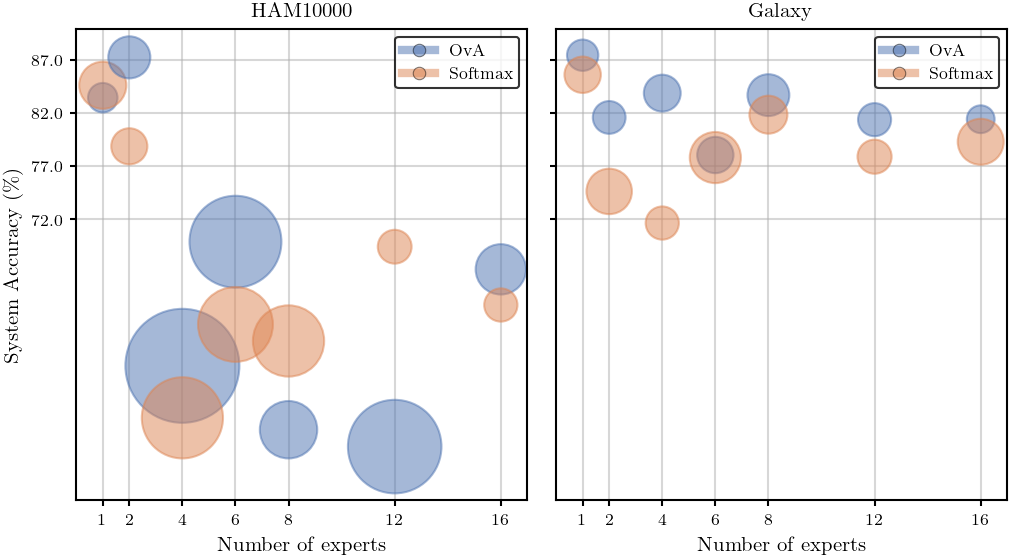

In [7]:
set_aistats2023_style()

fig, axs = plt.subplots(1,2, sharex=True, sharey=True, figsize=(7,5)) # note we must use plt.subplots, not plt.subplot

ax_ham = axs[0]
# HAM 10000 ===
dataset = "HAM10000"
# =======================
x_axis = [exp*10 for exp in exp_list]
scale_mark = 5
scale_y = 4
for i, e in enumerate(exp_list):    
    radius_ova = ova_ham_std[i]
    print("{} | OvA {} expert: Mean {} \ Std {}".format(dataset, e, ova_ham_mean[i], ova_ham_std[i]))
    ax_ham.add_patch(plt.Circle((x_axis[i], ova_ham_mean[i] * scale_y), radius_ova + scale_mark, fill=True, alpha=0.5, color=cmap[0]))
    radius_softmax = softmax_ham_std[i]
    print("{} | Softmax {} expert: Mean {} \ Std {}".format(dataset, e, softmax_ham_mean[i], softmax_ham_std[i]))
    ax_ham.add_patch(plt.Circle((x_axis[i], softmax_ham_mean[i] * scale_y), radius_softmax + scale_mark, fill=True, alpha=0.5, color=cmap[1]))

ax_ham.set_xlim(min(x_axis)-5, max(x_axis)+5)
ax_ham.set_xticks(x_axis, exp_list)
min_y_ham = min(min(ova_ham_mean), min(softmax_ham_mean))
max_y_ham = max(max(ova_ham_mean), max(softmax_ham_mean))
yticks = np.round(np.linspace(min_y, max_y, len(exp_list)))[::2]
ax_ham.set_yticks(yticks*scale_y, yticks)

# Legend
ova_leg = mlines.Line2D([], [], label="OvA", alpha=0.5, marker="o", color=cmap[0])
softmax_leg = mlines.Line2D([], [], label="Softmax", alpha=0.5, marker="o", color=cmap[1])
ax_ham.legend(handles=[ova_leg, softmax_leg], loc="best")

ax_ham.set_ylabel(r"System Accuracy $(\%)$")
ax_ham.set_xlabel(r"Number of experts")
ax_ham.set_title("{}".format(dataset))
ax_ham.grid()

# IMPORTANT! This allows to get the circles. Otherwise, ellipses!
ax_ham.set_aspect(1, adjustable='box')

dataset = "Galaxy"
ax_galaxy = axs[1]
# =======================
x_axis = [exp*10 for exp in exp_list]

scale_mark = 5
scale_y = 4
for i, e in enumerate(exp_list):    
    radius_ova = ova_galaxy_std[i]
    print("{} | OvA {} expert: Mean {} \ Std {}".format(dataset, e, ova_galaxy_mean[i], ova_galaxy_std[i]))
    ax_galaxy.add_patch(plt.Circle((x_axis[i], ova_galaxy_mean[i] * scale_y), radius_ova + scale_mark, fill=True, alpha=0.5, color=cmap[0]))
    radius_softmax = softmax_galaxy_std[i]
    print("{} | Softmax {} expert: Mean {} \ Std {}".format(dataset, e, softmax_galaxy_mean[i], softmax_galaxy_std[i]))
    ax_galaxy.add_patch(plt.Circle((x_axis[i], softmax_galaxy_mean[i] * scale_y), radius_softmax + scale_mark, fill=True, alpha=0.5, color=cmap[1]))

# plt.plot(x_axis, ova_galaxy_mean, color="black", linestyle="dotted", alpha=0.5)
# plt.plot(x_axis, softmax_galaxy_mean, color="black", linestyle="dashed", alpha=0.5)

ax_galaxy.set_xlim(0, 170)
ax_galaxy.set_xticks(x_axis, exp_list)
min_y_galaxy = min(min(ova_galaxy_mean), min(softmax_galaxy_mean))
max_y_galaxy = max(max(ova_galaxy_mean), max(softmax_galaxy_mean))
yticks = np.round(np.linspace(min_y, max_y, len(exp_list)))[::2]
ax_galaxy.set_yticks(yticks*scale_y, yticks)

# Legend
ova_leg = mlines.Line2D([], [], label="OvA", alpha=0.5, marker="o", color=cmap[0])
softmax_leg = mlines.Line2D([], [], label="Softmax", alpha=0.5, marker="o", color=cmap[1])
ax_galaxy.legend(handles=[ova_leg, softmax_leg], loc="best")

# ax_galaxy.set_ylabel(r"System Accuracy $(\%)$")
ax_galaxy.set_xlabel(r"Number of experts")
ax_galaxy.set_title("{}".format(dataset))
ax_galaxy.grid()

y_lim_min_global = min(min_y_ham, min_y_galaxy) * scale_y
y_lim_max_global = max(max_y_ham, max_y_galaxy) * scale_y

ax_ham.set_ylim(y_lim_min_global -20, y_lim_max_global +10)


# IMPORTANT! This allows to get the circles. Otherwise, ellipses!
ax_galaxy.set_aspect(1, adjustable='box')
fig.tight_layout()
plt.savefig("datasets.pdf")


